In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("train.csv")
data1 = pd.read_csv("test.csv")

In [ ]:
train = data
test = data1

In [ ]:
type(train)
type(test)

pandas.core.frame.DataFrame

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


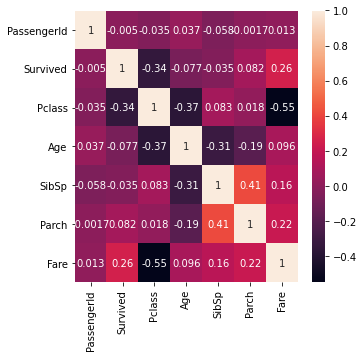

In [ ]:
cor = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(cor, annot = True)

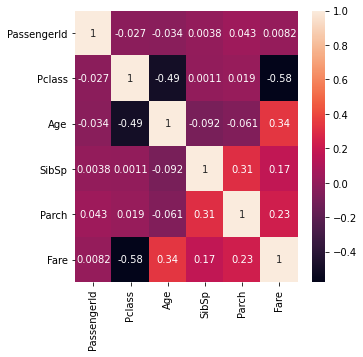

In [ ]:
cor1 = data1.corr()
plt.figure(figsize = (5,5))
sns.heatmap(cor1, annot = True)

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train1 = train.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis = 1) 

In [ ]:
train1.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S


In [ ]:
test1 = test.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis = 1) 

In [ ]:
test1.head(4) 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S


In [ ]:
train1.value_counts('Sex')

Sex
male      577
female    314
dtype: int64

In [ ]:
test1.value_counts('Sex')

Sex
male      266
female    152
dtype: int64

In [ ]:
train1['Sex'] = train1['Sex']. map({'female': 0, 'male':1})

In [ ]:
train1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
test1['Sex'] = test1['Sex'].map({'female' : 0, 'male':1})

In [ ]:
test1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [ ]:
train1['Embarked'] = train1['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [ ]:
train1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [ ]:
test1['Embarked'] = test1['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype(int)

In [ ]:
test1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1


In [ ]:
test1.info(), train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64


(None, None)

In [ ]:
x = train1.drop('Survived', axis = 1)
y = pd.DataFrame(train1['Survived'])

In [ ]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1.0
1,1,0,38.0,1,0,71.2833,2.0
2,3,0,26.0,0,0,7.9250,1.0
3,1,0,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0


In [ ]:
y.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
print(train1['Age'].isnull().value_counts())

False    714
True     177
Name: Age, dtype: int64


In [ ]:
median = train1['Age'].median()
train1['Age'].fillna(median, inplace=True)

In [ ]:
print(train1['Age'].isnull().value_counts())

False    891
Name: Age, dtype: int64


In [ ]:
print(test1['Age'].isnull().value_counts())

False    332
True      86
Name: Age, dtype: int64


In [ ]:
median1 = test1['Age'].median()
test1['Age'].fillna(median1, inplace=True)

In [ ]:
print(test1['Age'].isnull().value_counts())

False    418
Name: Age, dtype: int64


In [ ]:
train1.isna().value_counts()

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False       889
                                                     True          2
dtype: int64

In [ ]:
test1.isna().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       417
                                    True   False         1
dtype: int64

In [ ]:
print(test1['Embarked'].isnull().value_counts())

False    418
Name: Embarked, dtype: int64


In [ ]:
print(train1['Embarked'].isnull().value_counts())

False    889
True       2
Name: Embarked, dtype: int64


In [ ]:
print(test1['Fare'].isnull().value_counts())

False    417
True       1
Name: Fare, dtype: int64


In [ ]:
median2 = test1['Fare'].median()
test1['Fare'].fillna(median2, inplace=True)

In [ ]:
print(test1['Fare'].isnull().value_counts())

False    418
Name: Fare, dtype: int64


In [ ]:
median3 = train1['Embarked'].median()
train1['Embarked'].fillna(median3, inplace=True)

In [ ]:
print(train1['Embarked'].isnull().value_counts())

False    891
Name: Embarked, dtype: int64


In [ ]:
train1.isnull().value_counts()

Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False     False   False  False  False  False  False  False       891
dtype: int64

In [ ]:
test1.isnull().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       418
dtype: int64

In [ ]:
train1.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0


In [ ]:
test1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1


In [ ]:
### copy of the main data before grouping the age and scaling the column Fare....
trainc1 = train1
testc1 = test1

In [ ]:
type(trainc1), type(testc1)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
train1.loc[train['Age']==0, 'Age'] = 1

train1.loc[(train1['Age'] > 12) & (train1['Age']<=25), 'Age' ] = 2

train1.loc[(train1['Age'] > 25) & (train1['Age']<=40), 'Age' ] = 3

train1.loc[(train1['Age'] > 40) & (train1['Age']<=60), 'Age' ] = 4

train1.loc[(train1['Age'] > 60) & (train1['Age']<=80), 'Age' ] = 5

train1.loc[train1['Age']>80, 'Age'] = 6

In [ ]:
train1.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,7.2500,1.0
1,1,1,0,3.0,1,0,71.2833,2.0
2,1,3,0,3.0,0,0,7.9250,1.0
3,1,1,0,3.0,1,0,53.1000,1.0


In [ ]:
test1.loc[test1['Age']==0, 'Age'] = 1

test1.loc[(test1['Age'] > 12) & (test1['Age']<=25), 'Age' ] = 2

test1.loc[(test1['Age'] > 25) & (test1['Age']<=40), 'Age' ] = 3

test1.loc[(test1['Age'] > 40) & (test1['Age']<=60), 'Age' ] = 4

test1.loc[(test1['Age'] > 60) & (test1['Age']<=80), 'Age' ] = 5

test1.loc[test1['Age']>80, 'Age'] = 6

In [ ]:
test1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.0,0,0,7.8292,3
1,3,0,4.0,1,0,7.0000,1
2,2,1,5.0,0,0,9.6875,3
3,3,1,3.0,0,0,8.6625,1


In [ ]:
min_max_scaling = preprocessing.MinMaxScaler()

In [ ]:
train1[["Fare"]] = min_max_scaling.fit_transform( train1[["Fare"]] )

In [ ]:
train1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,0.014151,1.0
1,1,1,0,3.0,1,0,0.139136,2.0
2,1,3,0,3.0,0,0,0.015469,1.0
3,1,1,0,3.0,1,0,0.103644,1.0
4,0,3,1,3.0,0,0,0.015713,1.0


In [ ]:
test1[["Fare"]] = min_max_scaling.fit_transform( test1[["Fare"]])

In [ ]:
test1.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.0,0,0,0.015282,3
1,3,0,4.0,1,0,0.013663,1
2,2,1,5.0,0,0,0.018909,3
3,3,1,3.0,0,0,0.016908,1
4,3,0,2.0,1,1,0.023984,1


In [ ]:
x1 = train1.drop('Survived', axis = 1)
y1 = pd.DataFrame(train1['Survived'])

In [ ]:
x1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2.0,1,0,0.014151,1.0
1,1,0,3.0,1,0,0.139136,2.0
2,3,0,3.0,0,0,0.015469,1.0
3,1,0,3.0,1,0,0.103644,1.0


In [ ]:
y1.head(4)

,Survived
0,0
1,1
2,1
3,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 1 ) 

In [ ]:
print( x1.mean(), x_train.mean(), x_test.mean() ) 

Pclass      2.308642
Sex         0.647587
Age         3.069776
SibSp       0.523008
Parch       0.381594
Fare        0.062858
Embarked    1.361392
dtype: float64 Pclass      2.321856
Sex         0.651198
Age         3.082964
SibSp       0.498503
Parch       0.383234
Fare        0.061624
Embarked    1.359281
dtype: float64 Pclass      2.269058
Sex         0.636771
Age         3.030269
SibSp       0.596413
Parch       0.376682
Fare        0.066557
Embarked    1.367713
dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.84

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83.08

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


86.08

In [ ]:
perceptron = Perceptron(max_iter = 10)
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.09

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

94.91

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


94.91

In [ ]:
x1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2.0,1,0,0.014151,1.0
1,1,0,3.0,1,0,0.139136,2.0
2,3,0,3.0,0,0,0.015469,1.0
3,1,0,3.0,1,0,0.103644,1.0


In [ ]:
y1.head(4)

,Survived
0,0
1,1
2,1
3,1


In [ ]:
x_train1 = x1
y_train1 = y1

In [ ]:
type(x_train1), type(y_train1)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
test1.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.0,0,0,0.015282,3
1,3,0,4.0,1,0,0.013663,1
2,2,1,5.0,0,0,0.018909,3
3,3,1,3.0,0,0,0.016908,1


In [ ]:
test1.shape

(418, 7)

In [ ]:
x_test1 = test1

In [ ]:
type(x_test1)

pandas.core.frame.DataFrame

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)
Y_pred = logreg.predict(x_test1)
acc = round(logreg.score(x_train1, y_train1) * 100, 2)
acc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.13

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train1, y_train1)
Y_pred = random_forest.predict(x_test1)
random_forest.score(x_train1, y_train1)
acc = round(random_forest.score(x_train1, y_train1) * 100, 2)
acc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


94.16

In [ ]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Y_pred = pd.DataFrame(Y_pred)

result = pd.concat([test["PassengerId"], Y_pred], axis=1)
result.columns = ['PassengerId', 'Survived']
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('Predicted_Survived.csv') 